In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r"C:\Users\7719s\Desktop\ai_class\week3\abalone.csv")
# url 에서 읽는경우 df = pd.read_csv("https://example.com/path/to/your/data.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [4]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [5]:
df.isnull().sum()
# 결측치가 존재하는 경우 제거
# df = df.dropna()
# 필요없는 컬럼 제거하는 방법
# columns_to_delete = ['col1', 'col2']
# df = df.drop(columns=columns_to_delete)
# 평균값으로 채워넣는법
# mean_age = df['age'].mean()
# df['age'] = df['age'].fillna(mean_age)

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [6]:
label_encoder = LabelEncoder() # LabelEncoder 초기화
columns_to_encode = ['Sex'] # 특정 컬럼만 인코딩
for column in columns_to_encode:
    df.loc[:, column] = label_encoder.fit_transform(df[column])
print(df)

        id Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0        0   2   0.455     0.365   0.095        0.5140          0.2245   
1        1   2   0.350     0.265   0.090        0.2255          0.0995   
2        2   0   0.530     0.420   0.135        0.6770          0.2565   
3        3   2   0.440     0.365   0.125        0.5160          0.2155   
4        4   1   0.330     0.255   0.080        0.2050          0.0895   
...    ...  ..     ...       ...     ...           ...             ...   
4172  4172   0   0.565     0.450   0.165        0.8870          0.3700   
4173  4173   2   0.590     0.440   0.135        0.9660          0.4390   
4174  4174   2   0.600     0.475   0.205        1.1760          0.5255   
4175  4175   0   0.625     0.485   0.150        1.0945          0.5310   
4176  4176   2   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1500     15  
1             0.0485   

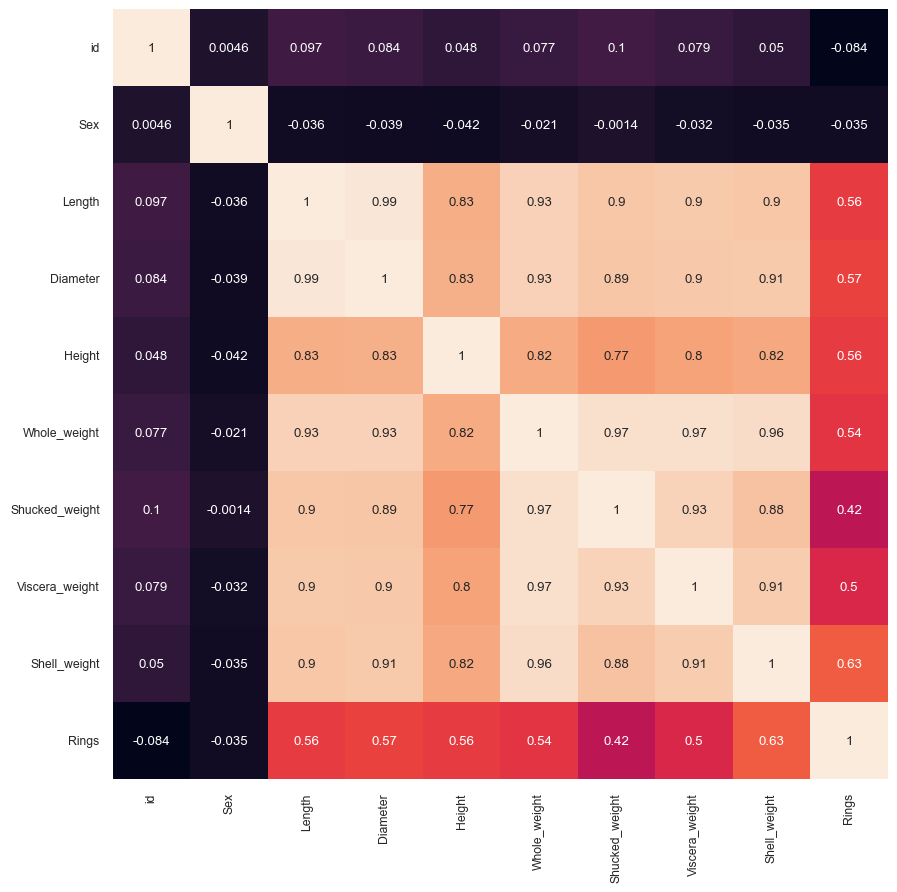

In [7]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr() # 데이터프레임 df의 각 열 간의 상관관계를 계산하여 상관관계 행렬(correlation matrix)을 만든다

#히트맵
plt.figure(figsize=(10,10)) # 그림의 크기를 10x10 인치로 설정한다.
sns.set(font_scale=0.8) # Seaborn의 기본 폰트 크기를 0.8배로 설정하여, 히트맵에 표시되는 텍스트의 크기를 조정한다
sns.heatmap(df_corr, annot=True, cbar=False)
# df_corr: 이전에 계산한 상관관계 행렬을 기반으로 히트맵을 그립니다, 
# annot=True: 각 셀에 상관계수 값을 표시합니다
# cbar=False: 색상 막대(color bar)를 표시하지 않습니다.
plt.show() # 히트맵을 화면에 출력합니다

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Rings', axis=1))

In [9]:
y=df['Rings']
y.value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.2,random_state=42)

In [11]:
# 컬럼갯수 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3341, 9) (3341,)
(836, 9) (836,)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression() #여기가 다름
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ly_preds, y_test)) # 정확도 출혁하는 부분도 다름

평균제곱근오차 4.960275930355894


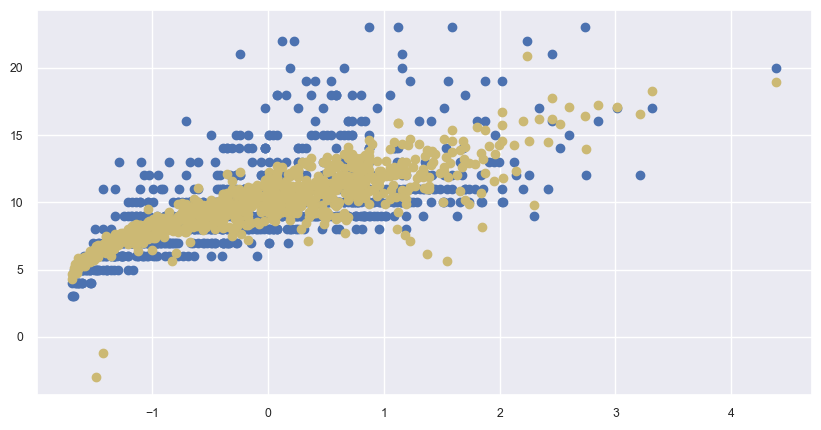

In [13]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5)) # 그래프의 전체 크기를 가로 10인치, 세로 5인치로 설정합니다.
plt.scatter(X_test[:, 8], y_test, label='y_test') # X축설정 8번째 컬럼으로 지정, Y축설정, 범례에 y_test레이블지정
plt.scatter(X_test[:, 8], ly_preds, c='y', label='ly_preds')  # X축설정 8번째 컬럼으로 지정 , Y축설정, 예측값의 점 노란색으로설정, 범례에 y_test레이블지정
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()         

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

model = DecisionTreeRegressor() # 여기가 다름
model.fit(X_train, y_train)
dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test)) # 정확도 출력하는 부분도 다름

평균제곱근오차 6.29066985645933


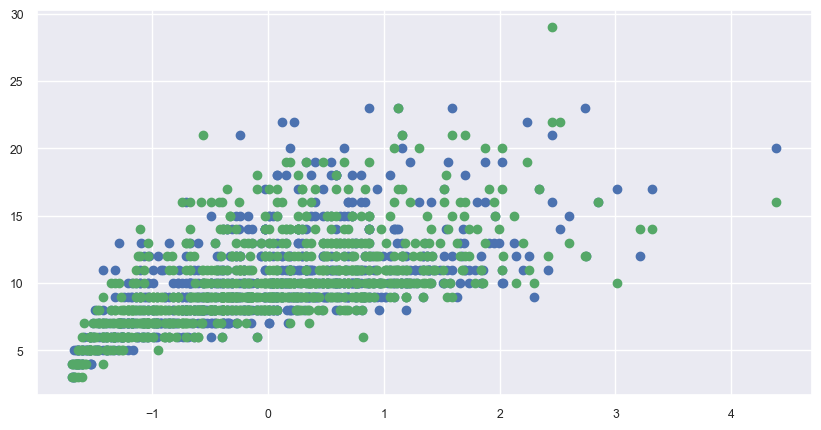

In [15]:
plt.figure(figsize=(10,5)) # 그래프의 전체 크기를 가로 10인치, 세로 5인치로 설정합니다.
plt.scatter(X_test[:, 8], y_test, label='y_test') # X축설정 8번째 컬럼으로 지정, Y축설정, 범례에 y_test레이블지정
plt.scatter(X_test[:, 8], dy_preds, c='g', label='dy_preds')  # X축설정 8번째 컬럼으로 지정 , Y축설정, 예측값의 점 초색으로설정, 범례에 y_test레이블지정
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()         

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor() # 여기가 다름
model.fit(X_train, y_train)
ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test)) # 정확도 출력하는 부분도 다름

평균제곱근오차 3.789008612440192


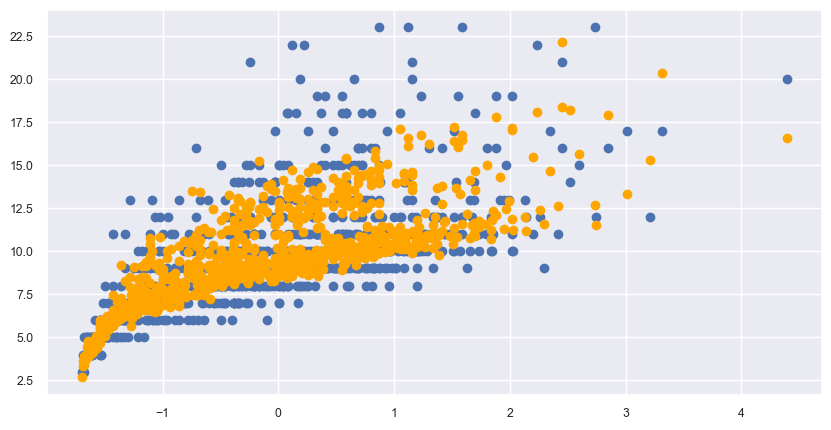

In [17]:
plt.figure(figsize=(10,5)) # 그래프의 전체 크기를 가로 10인치, 세로 5인치로 설정합니다.
plt.scatter(X_test[:, 8], y_test, label='y_test') # X축설정 8번째 컬럼으로 지정, Y축설정, 범례에 y_test레이블지정
plt.scatter(X_test[:, 8], ry_preds, c='orange', label='ry_preds')  # X축설정 8번째 컬럼으로 지정 , Y축설정, 예측값의 점 주황색으로설정, 범례에 y_test레이블지정
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()         

In [18]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

model = SVR(kernel='linear') # 여기가 다름
model.fit(X_train, y_train)
sy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(sy_preds, y_test)) # 정확도 출력하는 부분도 다름

평균제곱근오차 5.162444457647258


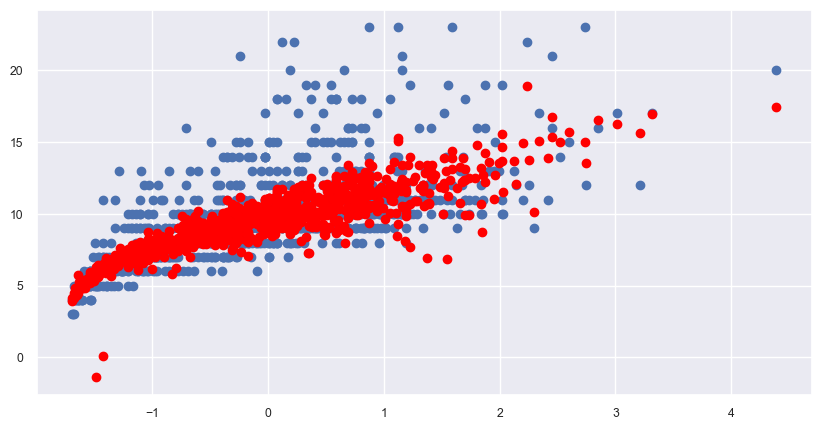

In [19]:
plt.figure(figsize=(10,5)) # 그래프의 전체 크기를 가로 10인치, 세로 5인치로 설정합니다.
plt.scatter(X_test[:, 8], y_test, label='y_test') # X축설정 8번째 컬럼으로 지정, Y축설정, 범례에 y_test레이블지정
plt.scatter(X_test[:, 8], sy_preds, c='red', label='sy_preds')  # X축설정 8번째 컬럼으로 지정 , Y축설정, 예측값의 점 빨간색으로설정, 범례에 y_test레이블지정
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()         